In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/AI Project Dataset.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AI Project Dataset.zip
   creating: AI Project Dataset/
  inflating: AI Project Dataset/Attack_types.txt  
  inflating: AI Project Dataset/Dataset.txt  


## Loading the Dataset

In [ ]:
import pandas as pd

# Load the dataset file
df = pd.read_csv('/content/AI Project Dataset/Dataset.txt' , low_memory=False) #low memory to disable warnings

# Load the attack types file
df1 = pd.read_csv('/content/AI Project Dataset/Attack_types.txt',  delimiter=' ')
df1.columns = ['attack_category', 'attack_type']

In [ ]:
df1.head(5)

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
print(df.head(20))

    duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0          0           tcp    ftp_data   SF        491          0     0   
1          0           udp       other   SF        146          0     0   
2          0           tcp     private   S0          0          0     0   
3          0           tcp        http   SF        232       8153     0   
4          0           tcp        http   SF        199        420     0   
5          0           tcp     private  REJ          0          0     0   
6          0           tcp     private   S0          0          0     0   
7          0           tcp     private   S0          0          0     0   
8          0           tcp  remote_job   S0          0          0     0   
9          0           tcp     private   S0          0          0     0   
10         0           tcp     private  REJ          0          0     0   
11         0           tcp     private   S0          0          0     0   
12         0           tc

In [ ]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')


# Preprocessing
### 1) Eliminating columns with mostly empty values




In [ ]:
df = df.drop(['duration', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login'], axis=1)


In [ ]:
df.head(20)

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.00,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,udp,other,SF,146,0,0,13,1,0.0,0.00,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,123,6,1.0,1.00,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,tcp,http,SF,232,8153,1,5,5,0.2,0.20,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,tcp,http,SF,199,420,1,30,32,0.0,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,tcp,private,REJ,0,0,0,121,19,0.0,0.00,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,tcp,private,S0,0,0,0,166,9,1.0,1.00,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,tcp,private,S0,0,0,0,117,16,1.0,1.00,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,tcp,remote_job,S0,0,0,0,270,23,1.0,1.00,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,tcp,private,S0,0,0,0,133,8,1.0,1.00,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [ ]:
# # save the DataFrame to an Excel file
# final_df.to_excel('final_df1.xlsx', index=False)

### 2) Checking missig values 

In [ ]:
missing_values =df.isnull().sum()

print(missing_values)

protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
logged_in                      0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
attack_category                0
occurance                      0
dtype: int64


### 3) Handling Outliers using the interquartile range (IQR) method. 

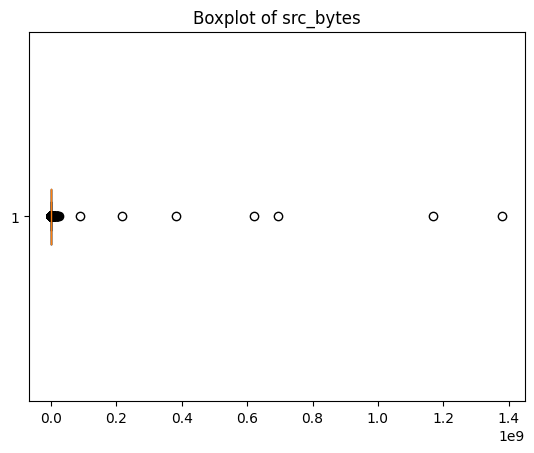

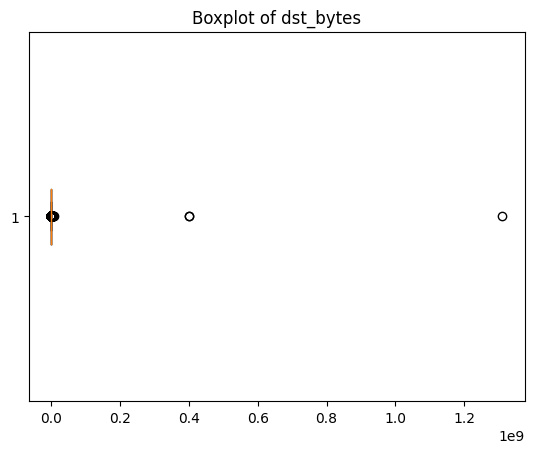

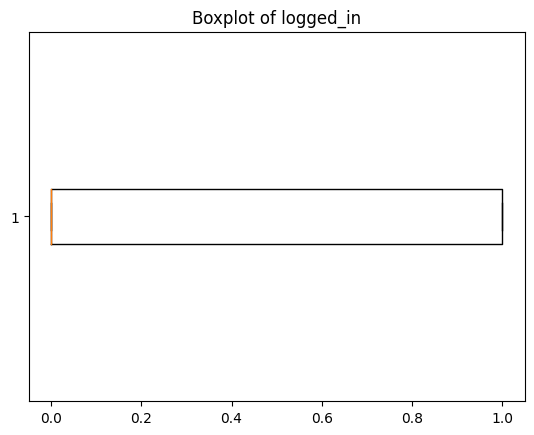

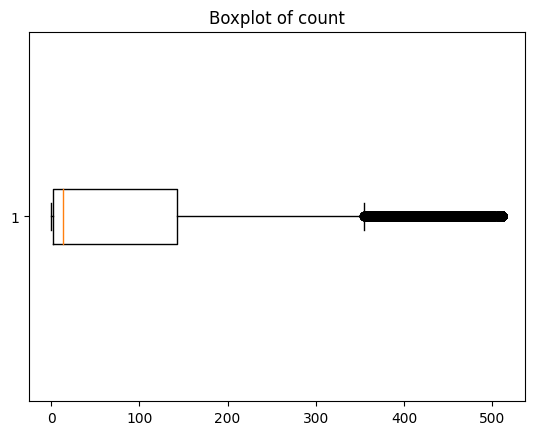

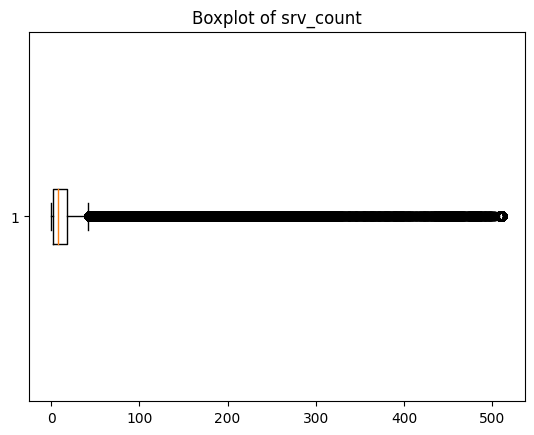

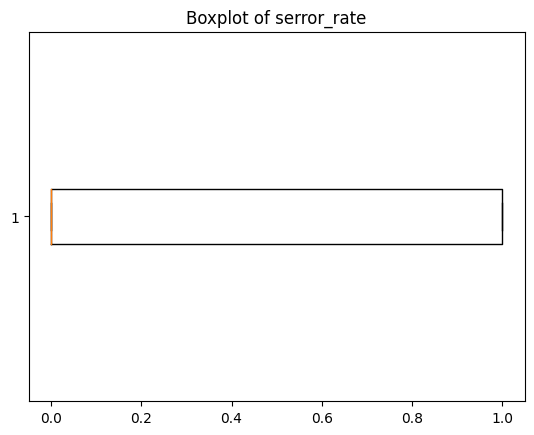

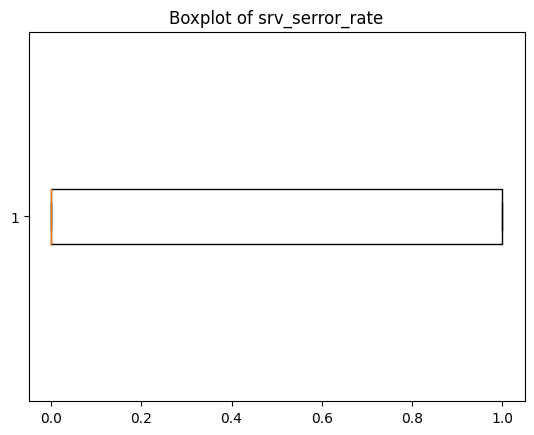

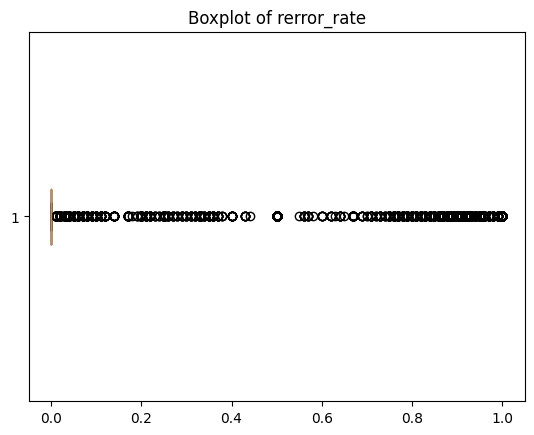

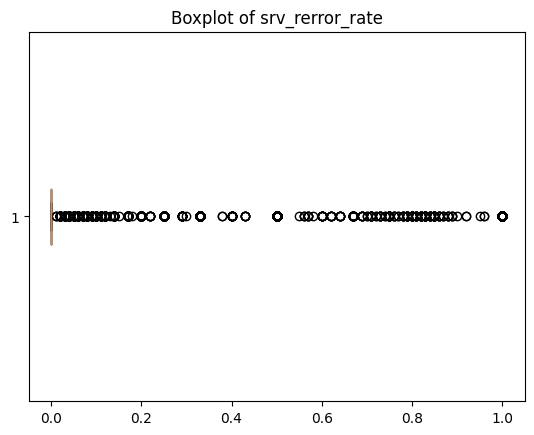

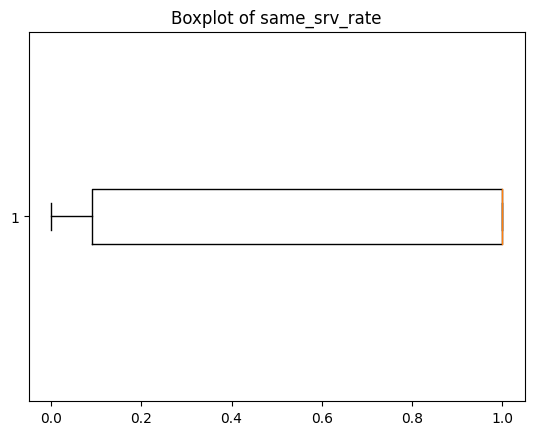

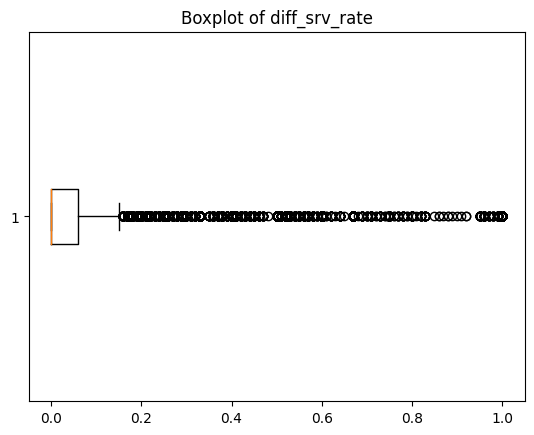

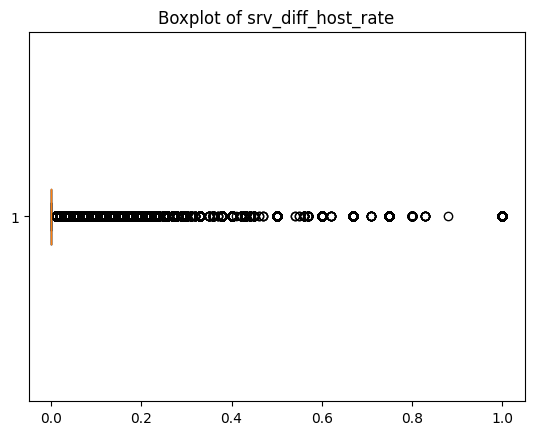

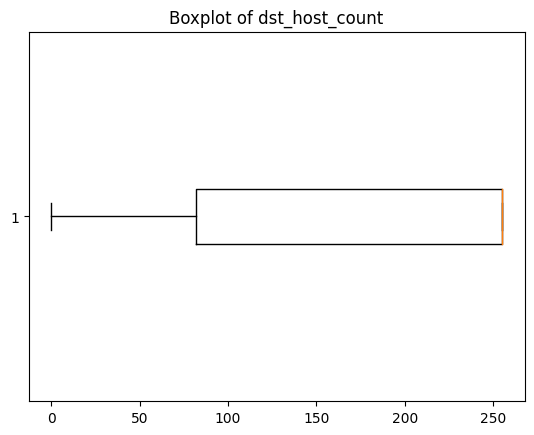

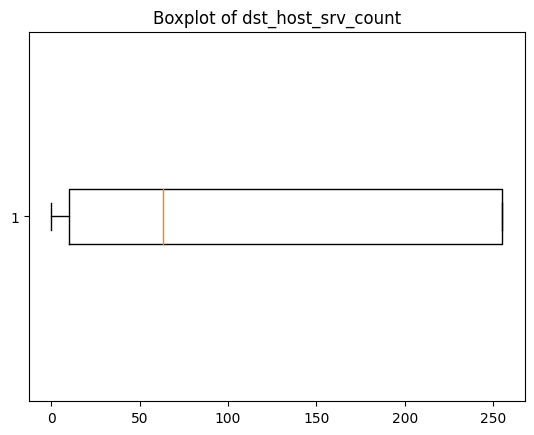

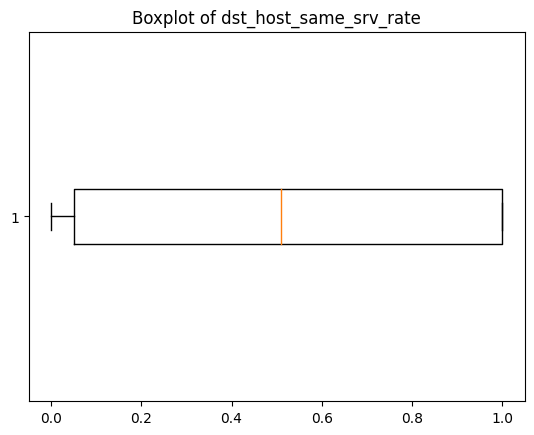

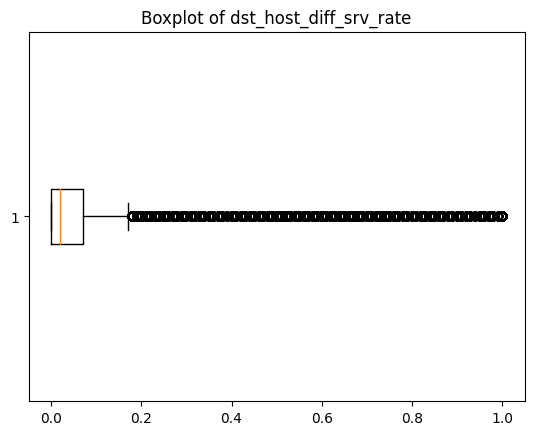

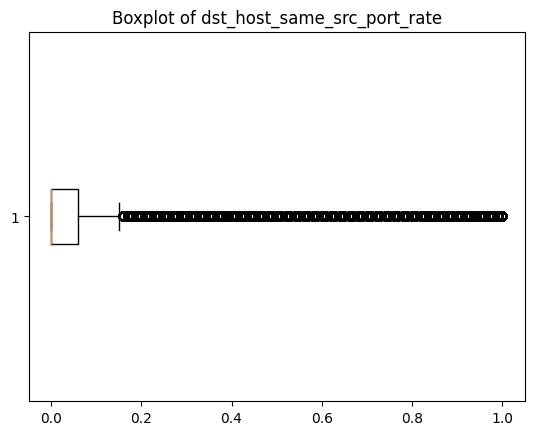

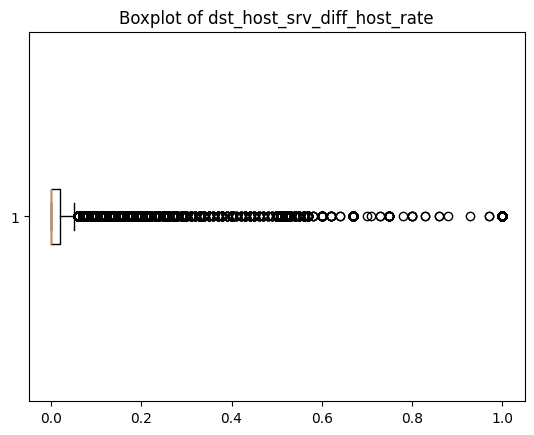

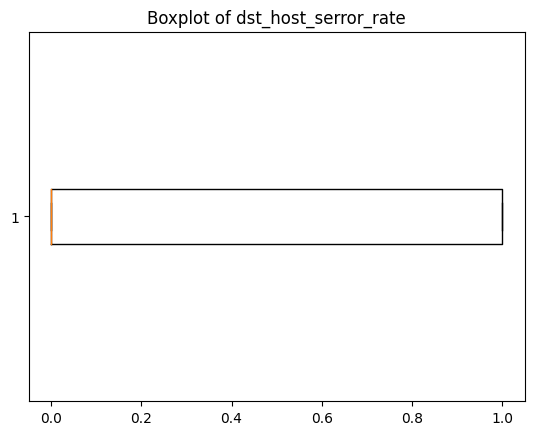

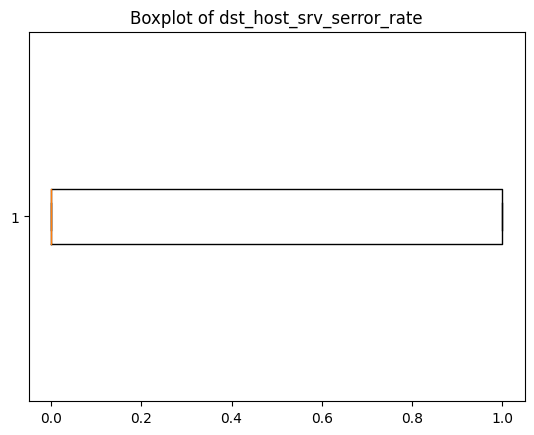

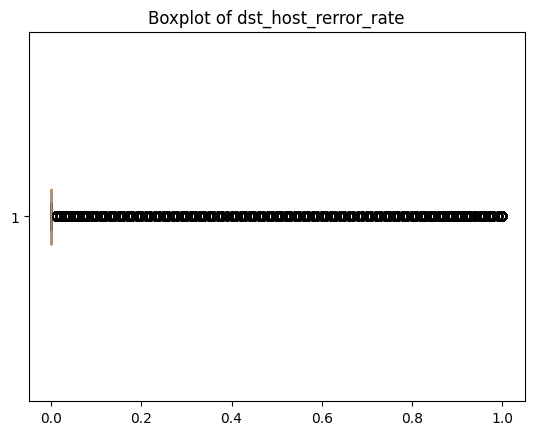

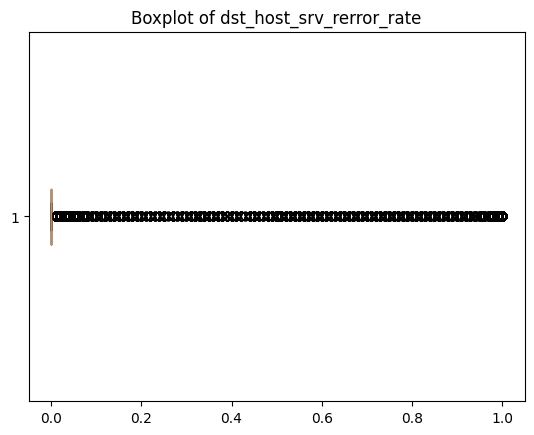

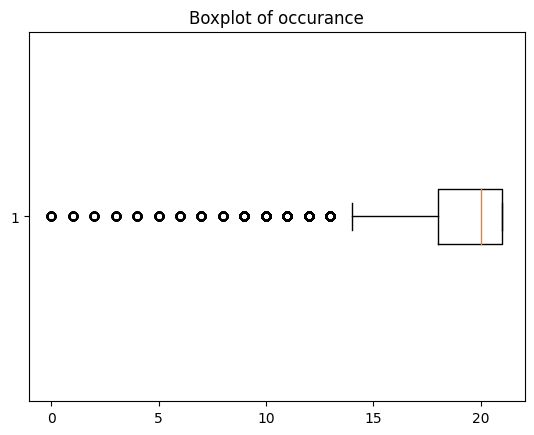

In [ ]:
import matplotlib.pyplot as plt

# assuming the data is in a pandas DataFrame named 'df'
column_names = ['src_bytes', 'dst_bytes', 'logged_in','count','srv_count','serror_rate','srv_serror_rate',
                'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                'dst_host_srv_rerror_rate','occurance']

for column_name in column_names:
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Boxplot of {column_name}')
    plt.show()


### 4) Feature Scalling 
#### to standardize the range of features

In [ ]:
df.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,udp,other,SF,146,0,0,13,1,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,123,6,1.0,1.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,tcp,http,SF,232,8153,1,5,5,0.2,0.2,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,tcp,http,SF,199,420,1,30,32,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming the data is in a pandas DataFrame named 'df'
column_names = ['serror_rate','srv_serror_rate',
                'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                'dst_host_srv_rerror_rate']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the columns
df[column_names] = scaler.fit_transform(df[column_names])

# Print the scaled columns
print(df[column_names])


        serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0               0.0              0.0          0.0              0.0   
1               0.0              0.0          0.0              0.0   
2               1.0              1.0          0.0              0.0   
3               0.2              0.2          0.0              0.0   
4               0.0              0.0          0.0              0.0   
...             ...              ...          ...              ...   
125968          1.0              1.0          0.0              0.0   
125969          0.0              0.0          0.0              0.0   
125970          0.0              0.0          0.0              0.0   
125971          1.0              1.0          0.0              0.0   
125972          0.0              0.0          0.0              0.0   

        same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0                1.00           0.00                0.00        0.588235   
1      

In [ ]:
df.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,udp,other,SF,146,0,0,13,1,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,123,6,1.0,1.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,tcp,http,SF,232,8153,1,5,5,0.2,0.2,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,tcp,http,SF,199,420,1,30,32,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# 3) Convert it to 5-classes using Attack_types.txt file

In [ ]:
unique_values = df['attack_category'].nunique()
print("Number of unique values in 'attack_category' column: ", unique_values)


Number of unique values in 'attack_category' column:  23


In [ ]:
# merge the datasets based on the 'attack_category' column
final_df = pd.merge(df, df1, on='attack_category', how='left')
final_df['attack_type'] = final_df['attack_type'].fillna('Normal')
# final_df.head(20)

In [ ]:
# Drop the 'attack_category' column
final_df = final_df.drop('attack_category', axis=1)

# Rename the 'attack_type' column to 'attack_category'
final_df = final_df.rename(columns={'attack_type': 'attack_category'})

In [ ]:
print(final_df.columns)

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance',
       'attack_category'],
      dtype='object')


In [ ]:
classes = final_df['attack_category'].unique()
print(classes)


['Normal' 'dos' 'r2l' 'probe' 'u2r']


In [ ]:
dff = final_df 

### Identifying the most relevant features for classification

Also Note that

1.   'Normal': 0,
2.   'dos': 1,
3.   'probe': 2,
4.   'r2l': 3,
5.   'u2r': 4

<ipython-input-322-4798fccb252c>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dff.corr()


The most relevant features for classification are:  ['dst_host_diff_srv_rate', 'count', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate']


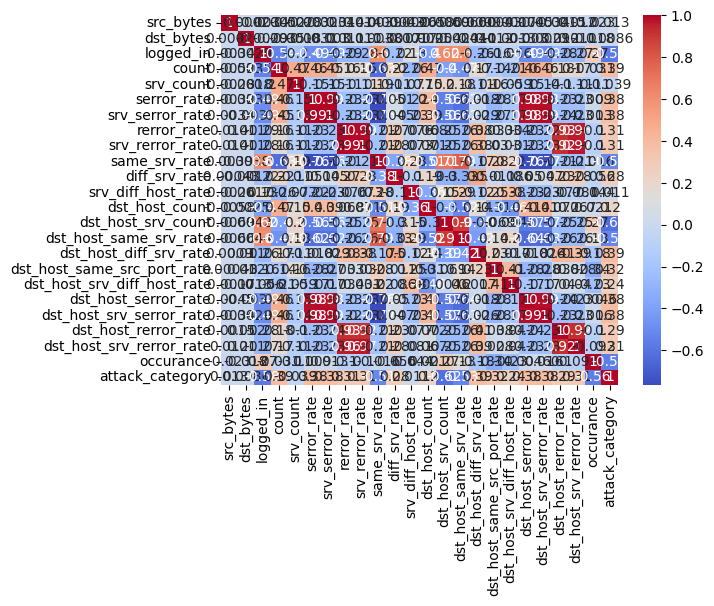

In [ ]:
import pandas as pd
import seaborn as sns

# encode the target variable
target_encodings = {
    'Normal': 0,
    'dos': 1,
    'probe': 2,
    'r2l': 3,
    'u2r': 4
}
dff['attack_category'] = dff['attack_category'].map(target_encodings)

# calculate the correlation matrix
corr_matrix = dff.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# find the features most correlated with the target variable
most_correlated_features = corr_matrix['attack_category'].sort_values(ascending=False)[1:6].index.tolist()

print("The most relevant features for classification are: ", most_correlated_features)


In [ ]:
print(dff.columns)

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance',
       'attack_category'],
      dtype='object')


In [ ]:
classes = dff['attack_category'].unique()
print(classes)


[0 1 3 2 4]


### Updated Dataset for classification

In [ ]:
new_df = dff[['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
               'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
               'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
               'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
               'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance',
               'attack_category']].copy()


## Classification of Cyber Attacks Using Decision Tree Algorithm

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# encode the target variable
target_encodings = {
    'Normal': 0,
    'dos': 1,
    'probe': 2,
    'r2l': 3,
    'u2r': 4
}
new_df['attack_category'] = new_df['attack_category'].map(target_encodings)

# select the most relevant features
selected_features = ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
               'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
               'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
               'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
               'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dff[selected_features], dff['attack_category'], test_size=0.3, random_state=42)

# create the Decision Tree classifier
clf = DecisionTreeClassifier()

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision score:", precision)
print("Recall score:", recall)
print("F1-score:", f1)



Accuracy score: 0.9982008678167001
Precision score: 0.9981426398807894
Recall score: 0.9982008678167001
F1-score: 0.9981460622270281


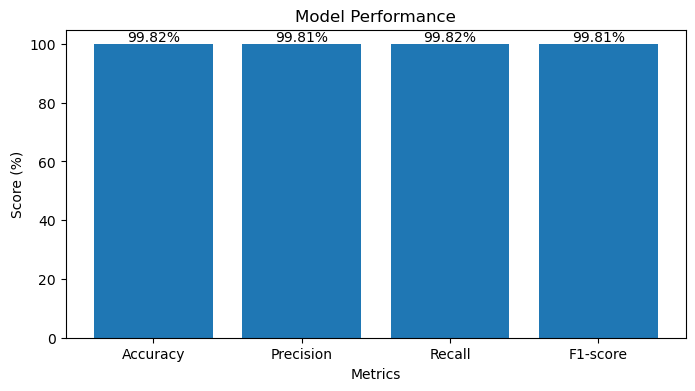

In [3]:
import matplotlib.pyplot as plt

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

# Create a list of score names and values
score_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy_percent, precision_percent, recall_percent, f1_percent]

# Plot the scores
plt.figure(figsize=(8, 4))
plt.bar(score_names, scores)
plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Model Performance')

# Add percentage values to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}%', ha='center', va='bottom')

plt.show()


### Classification of Cyber Attacks Using K-Nearest Neighbors Algorithm

In [ ]:
new_df = dff[['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
               'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
               'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
               'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
               'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance',
               'attack_category']].copy()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Separate the features and target variable
X = new_df.drop('attack_category', axis=1)
y = new_df['attack_category']

# Create a K-Nearest Neighbors classifier with K=5 as I get highest accuracy from k=5, always try to choose odd
# N represents the total number of instances or data points in the dataset from which KNN learns and makes predictions.
knn = KNeighborsClassifier(n_neighbors=5)

# Calculate the accuracy using 10-fold cross-validation
accuracy_scores = cross_val_score(knn, X, y, cv=10)

# Print the accuracy scores and the mean accuracy
print("Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())


Accuracy Scores: [0.99468212 0.99436463 0.99420589 0.99484086 0.99491983 0.99579298
 0.99515796 0.99499921 0.99476107 0.99523734]
Mean Accuracy: 0.994896189129231


### K-Mean Clustring
### Classification of Cyber Attacks Using Artificial Neural Networks (ANN)

In [12]:
new_df = df[['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
               'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
               'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
               'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
               'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'occurance',
               'attack_category']].copy()


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Step 1: Load the dataset
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file
df = new_df
# Step 2: Drop the 'attack_category' column
data = df.drop('attack_category', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


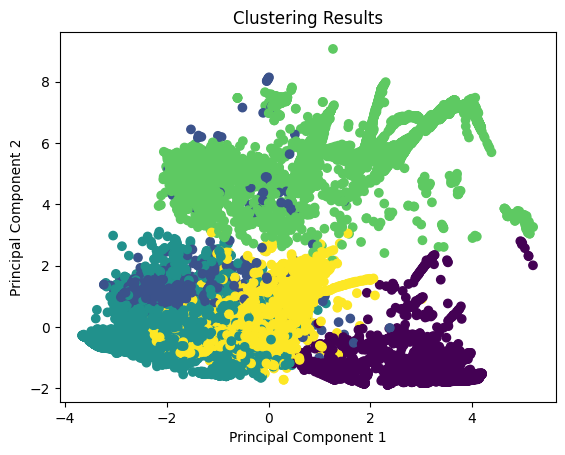

In [23]:


# Step 3: Apply feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Perform clustering with k-Means
kmeans = KMeans(n_clusters=5)  # Choose the desired number of clusters
labels = kmeans.fit_predict(scaled_data)

# Step 5: Visualize the results with a scatter plot
pca = PCA(n_components=2)  # Perform PCA for 2D visualization
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()


In [20]:
data['cluster_label'] = labels

data.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,cluster_label
0,491,0,0,2,2,0.0,0.0,0.0,0.0,1.00,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0
1,146,0,0,13,1,0.0,0.0,0.0,0.0,0.08,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0
2,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,2
3,232,8153,1,5,5,0.2,0.2,0.0,0.0,1.00,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1
4,199,420,1,30,32,0.0,0.0,0.0,0.0,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1


In [24]:

# Step 6: Prepare the labeled data for classification
labeled_data = pd.DataFrame(scaled_data, columns=data.columns)
labeled_data['label'] = labels

# Step 7: Split the data into training and testing sets
X = labeled_data.drop('label', axis=1)
y = labeled_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the ANN model (MLPClassifier)
model = MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.001)  
model.fit(X_train, y_train)

# Step 9: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


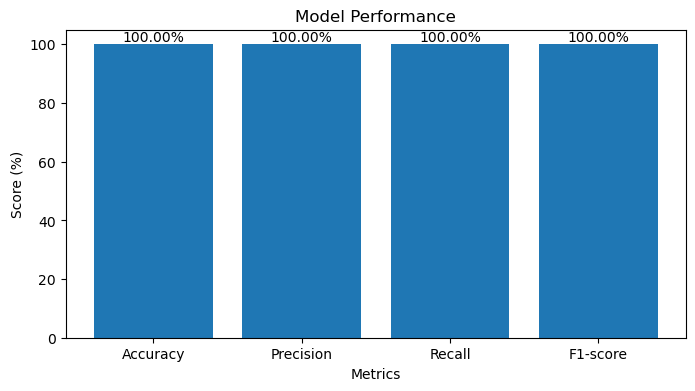

In [4]:
import matplotlib.pyplot as plt

# Calculate percentages
accuracy_percent = accuracy * 100
precision_percent = precision * 100
recall_percent = recall * 100
f1_percent = f1 * 100

# Create a list of score names and values
score_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy_percent, precision_percent, recall_percent, f1_percent]

# Plot the scores
plt.figure(figsize=(8, 4))
plt.bar(score_names, scores)
plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Model Performance')

# Add percentage values to the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}%', ha='center', va='bottom')

plt.show()
